In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from scipy.stats import f_oneway

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
house_df = pd.read_csv('./Data/train.csv', index_col='Id')
display(house_df)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [4]:
## Inspection of the data_description shows that not all of the sales made in this dataset are for residential homes, some are for commerical, agricultural, etc. I will remove all sales that are not residential from the dataset.

print(house_df['MSZoning'].unique())
print(house_df['MSZoning'].value_counts())

## Drop all rows where 'MSZoning' is A, C, or I.

house_df = house_df.loc[house_df['MSZoning'].isin(['RL', 'RM', 'RH', 'FV'])].reset_index(drop=True)

print(house_df['MSZoning'].value_counts())

['RL' 'RM' 'C (all)' 'FV' 'RH']
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
RL    1151
RM     218
FV      65
RH      16
Name: MSZoning, dtype: int64


<AxesSubplot:>

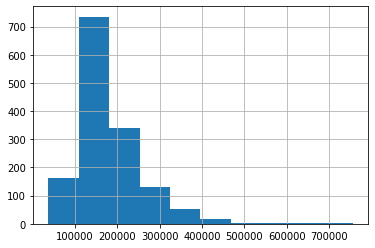

In [6]:
## Getting Descriptive Statistics for the target variable, SalesPrice

house_df.SalePrice.describe()

house_df.SalePrice.hist()


Skew Value: 1.9084160499655909


<AxesSubplot:>

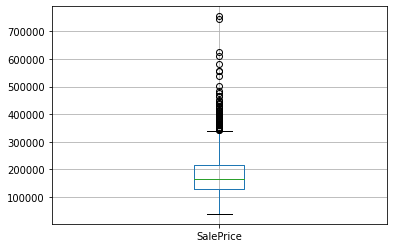

In [38]:
## Distribution of the y variable appears very right-skewed. We will possibly have to transform it in some way. Here is a boxplot and calculation of skewness value.

print('Skew Value:', house_df['SalePrice'].skew(axis=0))

house_df.boxplot(column='SalePrice', return_type='axes')

In [60]:
## Describing All features. I think there are many variables here that contain null values. 

null_counts = house_df.isna().sum().sort_values(ascending=False)
print(null_counts[null_counts > 0])



PoolQC          1443
MiscFeature     1398
Alley           1361
Fence           1172
FireplaceQu      681
LotFrontage      259
GarageYrBlt       79
GarageCond        79
GarageType        79
GarageFinish      79
GarageQual        79
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [61]:
## Considering this dataset only has 1460 rows, I am going to eliminate the 5 Factors at the top of the list above, as they have more than half of their rows with null values.

house_df = house_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis= 1)

display(house_df)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1446,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1447,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1448,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [75]:
## Seeing data types. I'm noticing that there are categorical columns like 'MSSubClass' that are technically numerical but in the context of the column they are categorical. We need to identify all of those and fix

print(house_df.select_dtypes([np.number]).columns)
print(house_df.select_dtypes([object]).columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'Ce

In [84]:
## Changing truly categorical columns to strings if they are numbers

new_cats = ['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

for col in new_cats:
    house_df[col] = house_df[col].astype(str)

nums = list(house_df.select_dtypes([np.number]).columns)
cats = list(house_df.select_dtypes([object]).columns)

print(nums)
print(cats)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'Yr

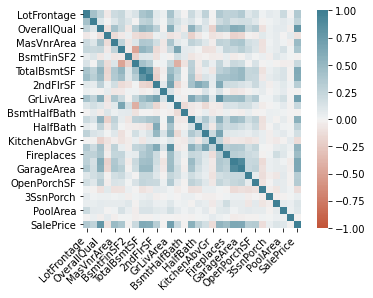

In [82]:
## Correlation Matrix. I have a suspicion that square footage metrics will be highly correlated.

corr = house_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [86]:
## That's hard to see so I'm just gonna print them. This is numerical variables only

for col in nums:
    print(col, 'correlation coefficient:', np.corrcoef(house_df[col], house_df['SalePrice'])[0])

## As suspected, the variables most highly correlated with SalePrice are OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, GarageCars, and GarageArea.

LotFrontage correlation coefficient: [nan nan]
LotArea correlation coefficient: [1.         0.26471494]
OverallQual correlation coefficient: [1.         0.78903107]
OverallCond correlation coefficient: [ 1.         -0.08908441]
MasVnrArea correlation coefficient: [nan nan]
BsmtFinSF1 correlation coefficient: [1.        0.3844751]
BsmtFinSF2 correlation coefficient: [ 1.         -0.01414489]
BsmtUnfSF correlation coefficient: [1.         0.21615216]
TotalBsmtSF correlation coefficient: [1.        0.6120876]
1stFlrSF correlation coefficient: [1.         0.60329989]
2ndFlrSF correlation coefficient: [1.        0.3197741]
LowQualFinSF correlation coefficient: [ 1.         -0.01875515]
GrLivArea correlation coefficient: [1.         0.70865801]
BsmtFullBath correlation coefficient: [1.         0.22405376]
BsmtHalfBath correlation coefficient: [ 1.         -0.01756115]
FullBath correlation coefficient: [1.         0.55667392]
HalfBath correlation coefficient: [1.         0.28088158]
BedroomAb

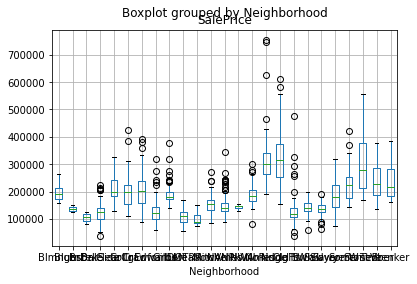

In [104]:
## LOCATION, LOCATION, LOCATION.
## I'm suspecting the neighborhood that the house is in will have a big impact on sale price. I'm going to run a one-way ANOVA to see if the mean Sale Price's for all neighborhoods are the same.

f = house_df.boxplot('SalePrice', by='Neighborhood')

In [103]:
## ANOVA Table

model = ols('SalePrice ~ C(Neighborhood)', data=house_df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

## The very high F value indicates that Location does matter. The mean Sale Price of a home across neighborhoods is not the same.

,sum_sq,df,F,PR(>F)
C(Neighborhood),4.918072e+12,24.0,70.100676,4.493316e-221
Residual,4.165587e+12,1425.0,NaN,NaN
